## Clustering
- 대표적인 비지도학습 알고리즘
- 레이블이 없는 데이터를 그룹화 하는 알고리즘

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster, mixture, datasets
from sklearn.preprocessing import StandardScaler

### 데이터 생성

In [3]:
def plot_data(dataset, position, title):
    X, y = dataset
    plt.subplot(position)
    plt.title(title)
    plt.scatter(X[:,0],X[:,1])

In [4]:
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

In [5]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structure = np.random.rand(n_samples,2), None

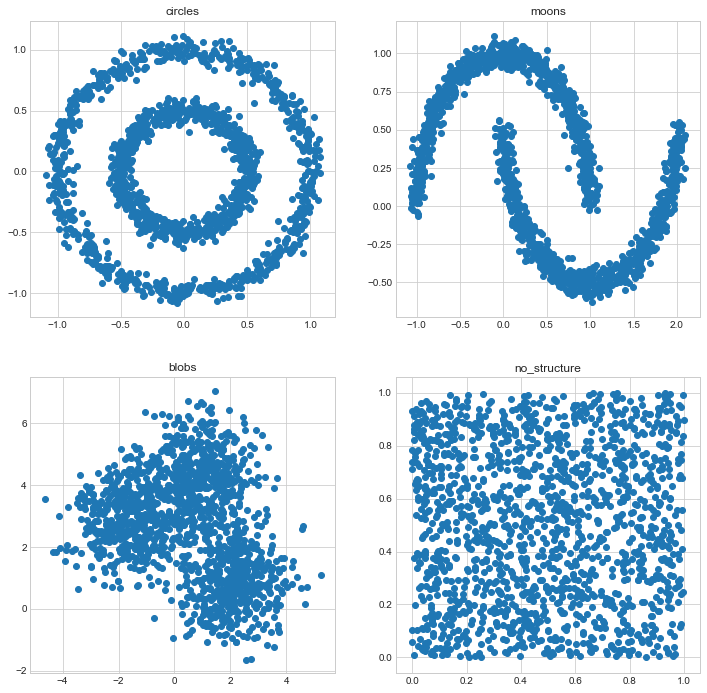

In [53]:
plt.figure(figsize=(12,12))
plot_data(circles, 221, 'circles')
plot_data(moons, 222, 'moons')
plot_data(blobs, 223, 'blobs')
plot_data(no_structure, 224, 'no_structure')

In [13]:
def fit_predict_plot(model, dataset, position, title):
    X, y = dataset
    model.fit(X)
    if hasattr(model, 'labels_'):
        labels = model.labels_.astype(np.int)
    else:
        labels = model.predict(X)
        
    colors = np.array(['#30A9DE', '#E53A40', '#090707', '#E0E3DA', '#EC7357', 
                       '#77AF9C', '#3F4B3B', '#5c196b', '#f8ecc9']) 
    #https://www.webdesignrankings.com/resources/lolcolors/
    
    ax = plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:,0],X[:,1],color=colors[labels])

### K-평균(K-Means)
- n개의 등분산 그룹으로 군집화
- 제곱합 함수를 최소화
- 군집화 개수를 지정해야 한다.
- 각 군집 C의 평균 $\mu_j$를 중심점이라고 함
- 다음을 만족하는 중심점을 찾는것이 목표

$$ \sum_{i=0}^n \underset{\mu_j\subseteq C}{min} (\parallel x_i - \mu_j \parallel^2 ) $$

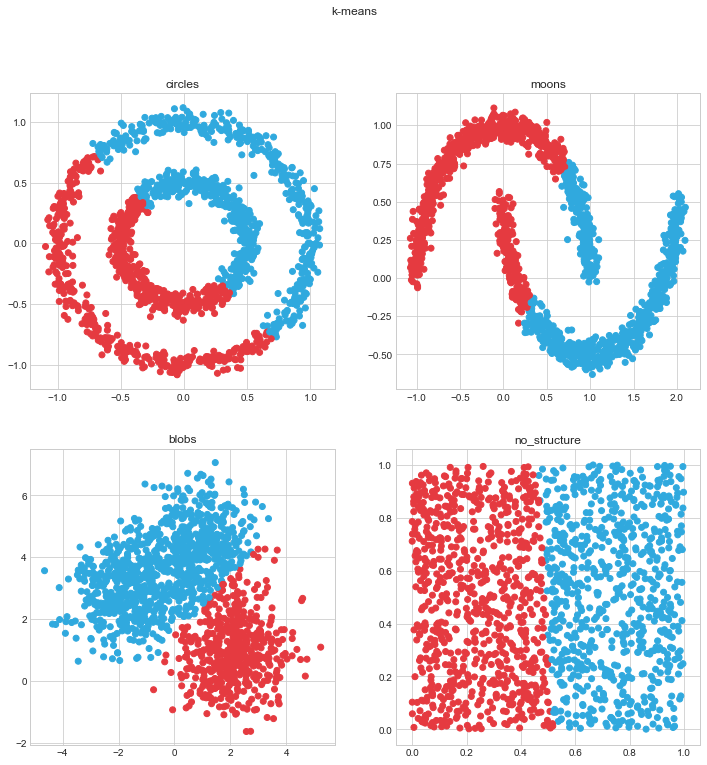

In [55]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('k-means')

fit_predict_plot(cluster.KMeans(n_clusters=2,random_state=random_state),circles,221,'circles')
fit_predict_plot(cluster.KMeans(n_clusters=2,random_state=random_state),moons,222,'moons')
fit_predict_plot(cluster.KMeans(n_clusters=2,random_state=random_state),blobs,223,'blobs')
fit_predict_plot(cluster.KMeans(n_clusters=2,random_state=random_state),no_structure,224,'no_structure')

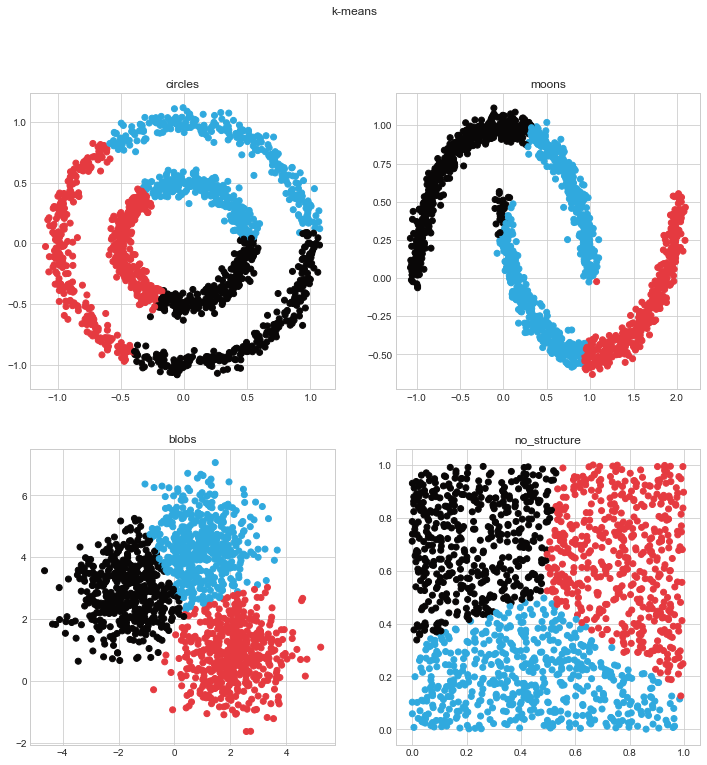

In [56]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('k-means')

fit_predict_plot(cluster.KMeans(n_clusters=3,random_state=random_state),circles,221,'circles')
fit_predict_plot(cluster.KMeans(n_clusters=3,random_state=random_state),moons,222,'moons')
fit_predict_plot(cluster.KMeans(n_clusters=3,random_state=random_state),blobs,223,'blobs')
fit_predict_plot(cluster.KMeans(n_clusters=3,random_state=random_state),no_structure,224,'no_structure')

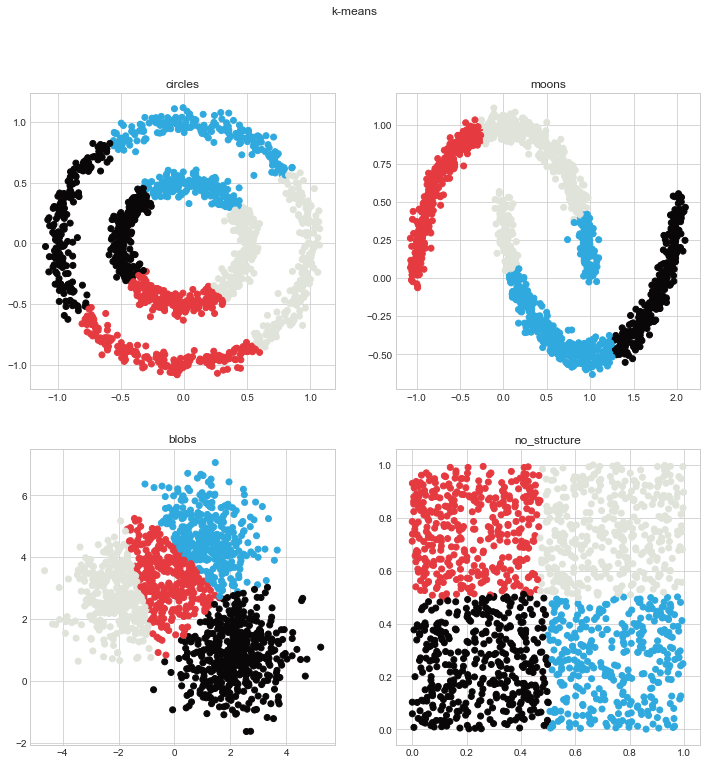

In [57]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('k-means')

fit_predict_plot(cluster.KMeans(n_clusters=4,random_state=random_state),circles,221,'circles')
fit_predict_plot(cluster.KMeans(n_clusters=4,random_state=random_state),moons,222,'moons')
fit_predict_plot(cluster.KMeans(n_clusters=4,random_state=random_state),blobs,223,'blobs')
fit_predict_plot(cluster.KMeans(n_clusters=4,random_state=random_state),no_structure,224,'no_structure')

### 붓꽃 데이터 군집화
- K-Means 알고리즘을 사용해 붓꽃 데이터를 군집화 해본다.
- 같은 종휴의 붓꽃끼리 잘 군집화가 되는지 확인한다.

In [7]:
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()

In [9]:
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data)
predict = model.predict(iris.data)

In [10]:
idx = np.where(predict==0)
iris.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [11]:
idx = np.where(predict==1)
iris.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
idx = np.where(predict==2)
iris.target[idx]

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 미니 배치 K-평균(Mini Batch K-Means
- 배치 처리를 통해 계산 시간을 줄인 K-평균
- K-편균과 다른 결과가 나올 수 있다.

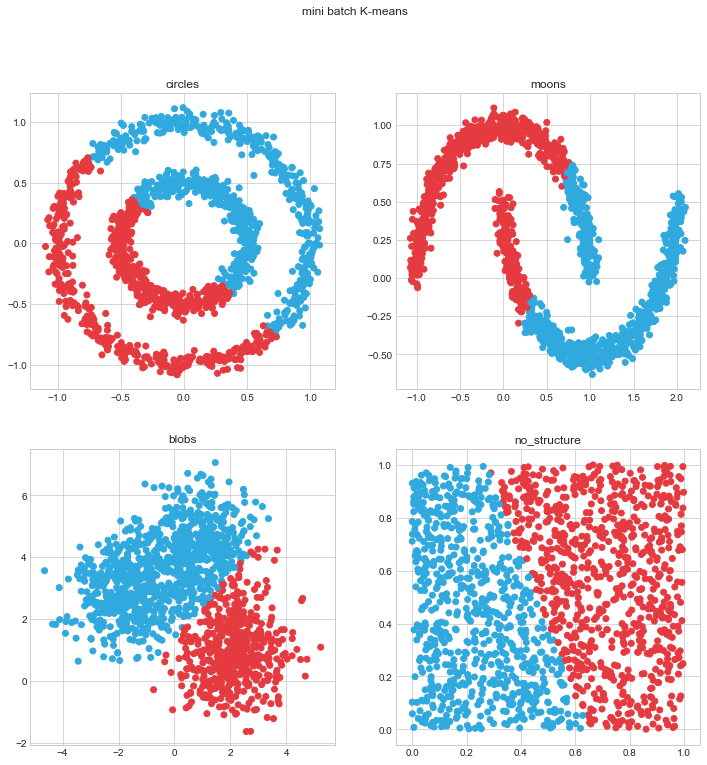

In [64]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('mini batch K-means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2,random_state=random_state),circles,221,'circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2,random_state=random_state),moons,222,'moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2,random_state=random_state),blobs,223,'blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2,random_state=random_state),no_structure,224,'no_structure')

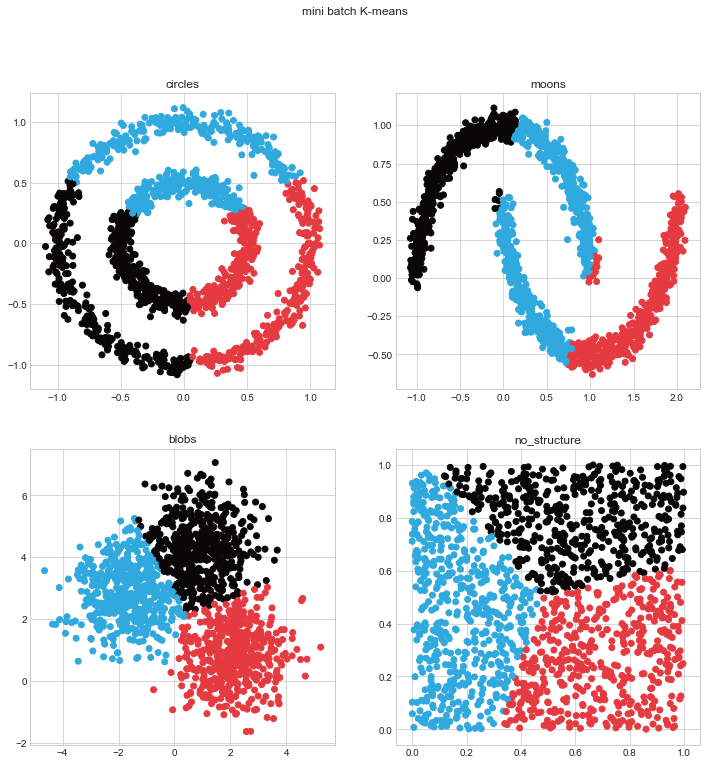

In [65]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('mini batch K-means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3,random_state=random_state),circles,221,'circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3,random_state=random_state),moons,222,'moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3,random_state=random_state),blobs,223,'blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3,random_state=random_state),no_structure,224,'no_structure')

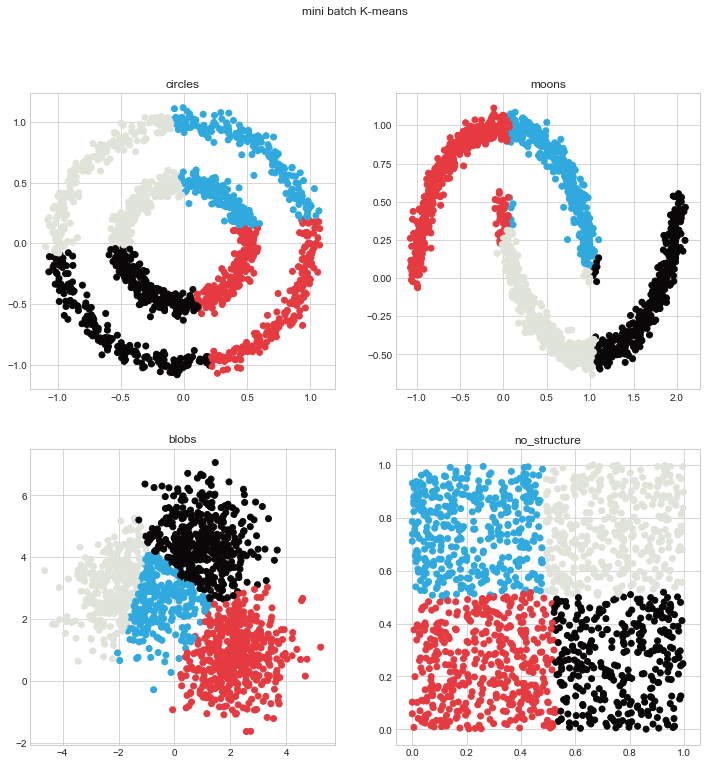

In [66]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('mini batch K-means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4,random_state=random_state),circles,221,'circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4,random_state=random_state),moons,222,'moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4,random_state=random_state),blobs,223,'blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4,random_state=random_state),no_structure,224,'no_structure')

### Affinity Propagation
- 샘플 쌍 끼리 메시지를 보내 군집을 생성
- 샘플을 대표하는 적절한 예를 찾을 때까지 반복
- 군집의 개수를 자동으로 정함

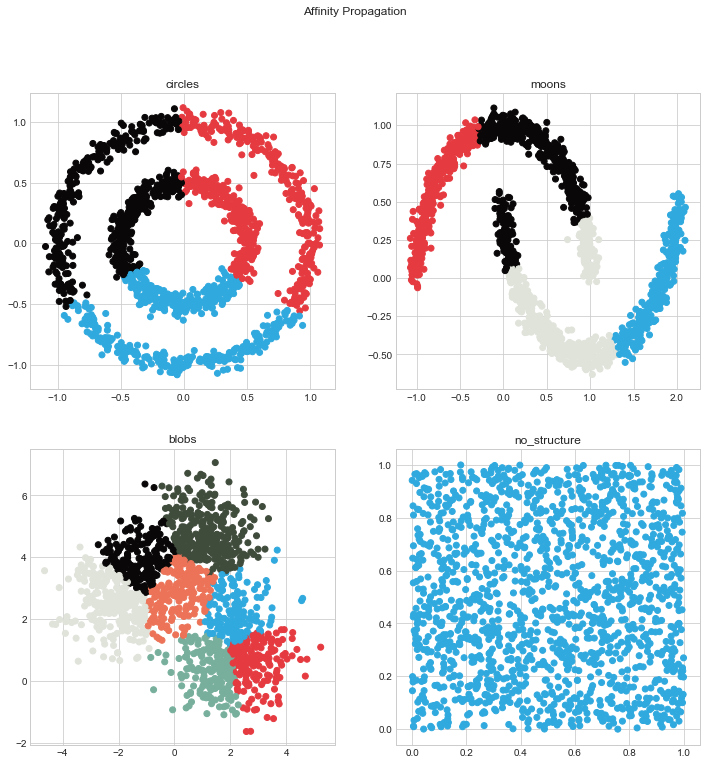

In [14]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Affinity Propagation')

fit_predict_plot(cluster.AffinityPropagation(damping=.9,preference=-200),circles,221,'circles')
fit_predict_plot(cluster.AffinityPropagation(damping=.9,preference=-200),moons,222,'moons')
fit_predict_plot(cluster.AffinityPropagation(damping=.9,preference=-200),blobs,223,'blobs')
fit_predict_plot(cluster.AffinityPropagation(damping=.9,preference=-200),no_structure,224,'no_structure')

### Mean Shift
- 중심점 후보를 정해진 구역 내 평균으로 업데이트

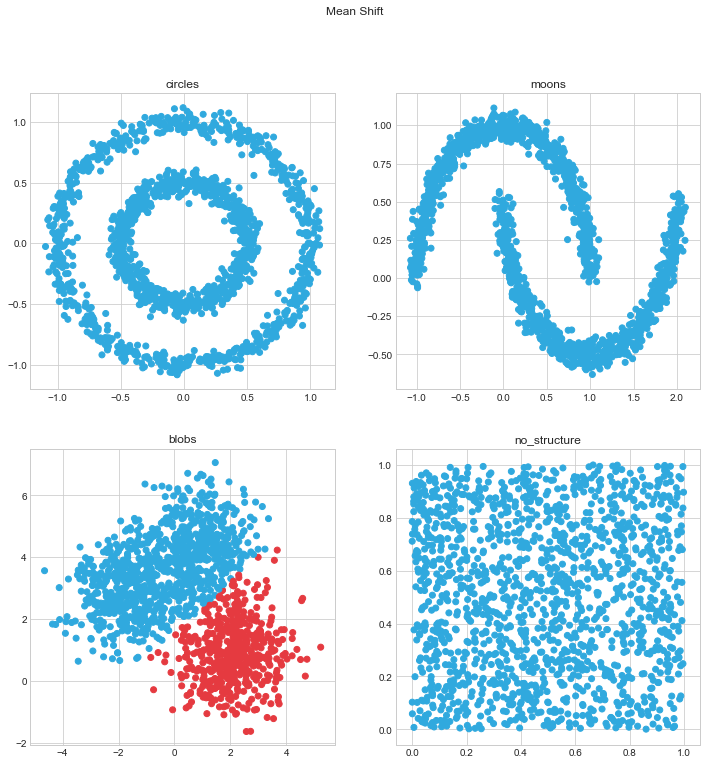

In [68]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Mean Shift')

fit_predict_plot(cluster.MeanShift(),circles,221,'circles')
fit_predict_plot(cluster.MeanShift(),moons,222,'moons')
fit_predict_plot(cluster.MeanShift(),blobs,223,'blobs')
fit_predict_plot(cluster.MeanShift(),no_structure,224,'no_structure')

### 스펙트럼 군집화(Spectral Clustering)

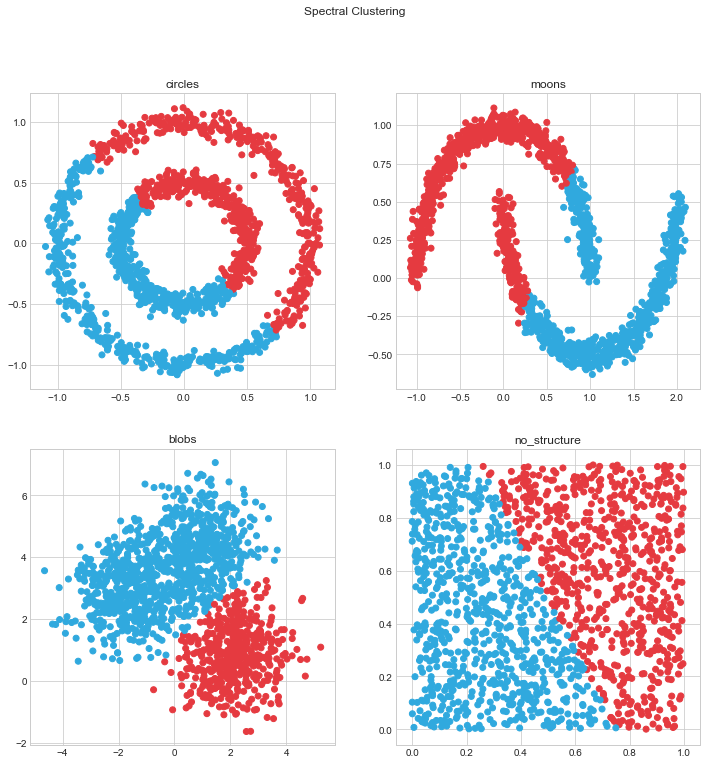

In [72]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=2,random_state=random_state),circles,221,'circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2,random_state=random_state),moons,222,'moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2,random_state=random_state),blobs,223,'blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2,random_state=random_state),no_structure,224,'no_structure')

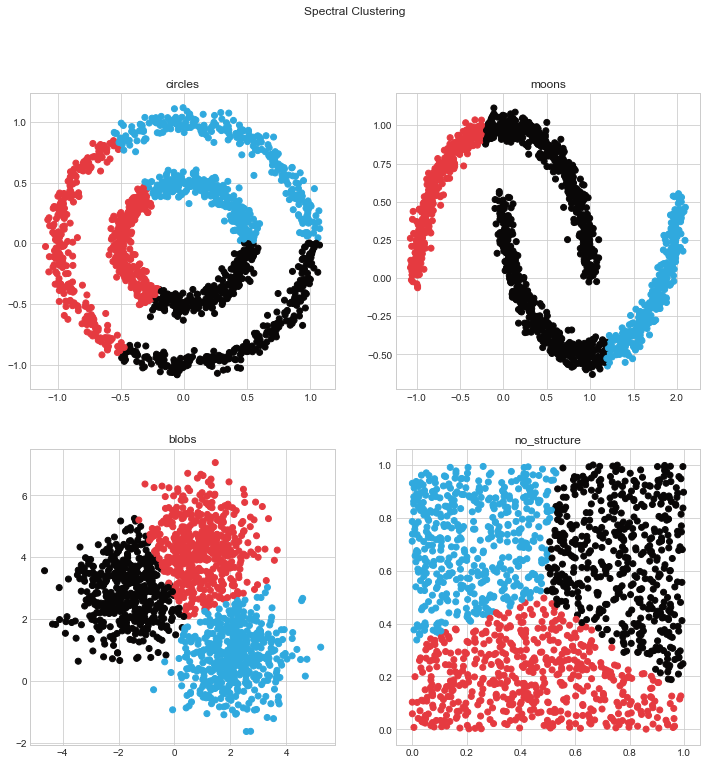

In [73]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=3,random_state=random_state),circles,221,'circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3,random_state=random_state),moons,222,'moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3,random_state=random_state),blobs,223,'blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3,random_state=random_state),no_structure,224,'no_structure')

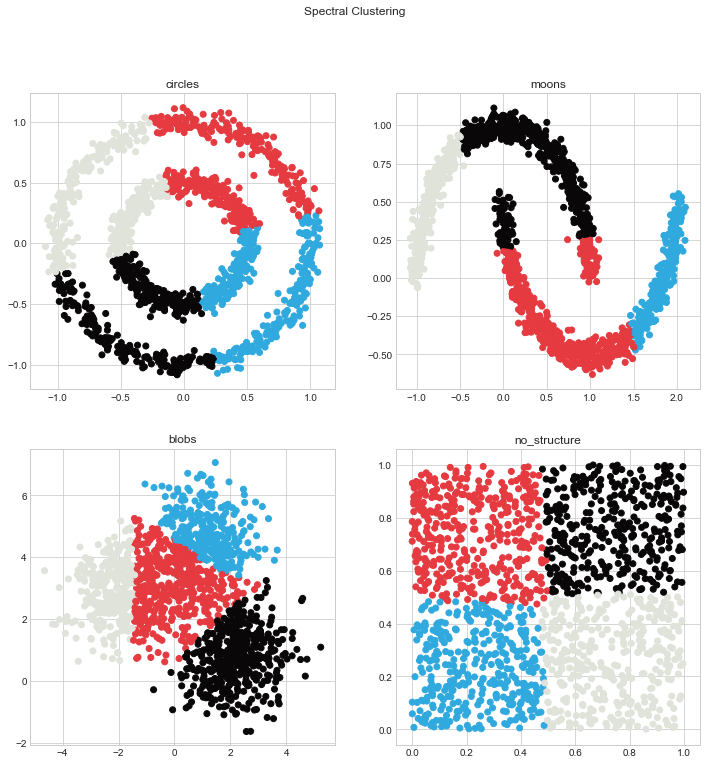

In [74]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=4,random_state=random_state),circles,221,'circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4,random_state=random_state),moons,222,'moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4,random_state=random_state),blobs,223,'blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4,random_state=random_state),no_structure,224,'no_structure')

### 유방암 데이터 군집화

In [75]:
from sklearn.datasets import load_breast_cancer

In [76]:
cancer = load_breast_cancer()

In [77]:
model = cluster.SpectralClustering(n_clusters=2,eigen_solver='arpack',affinity='nearest_neighbors')
model.fit(cancer.data)
predict = model.labels_

In [78]:
idx = np.where(predict==0)
cancer.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [79]:
idx = np.where(predict==1)
cancer.target[idx]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

### 계층 군집화(Hierarchical Clustering)

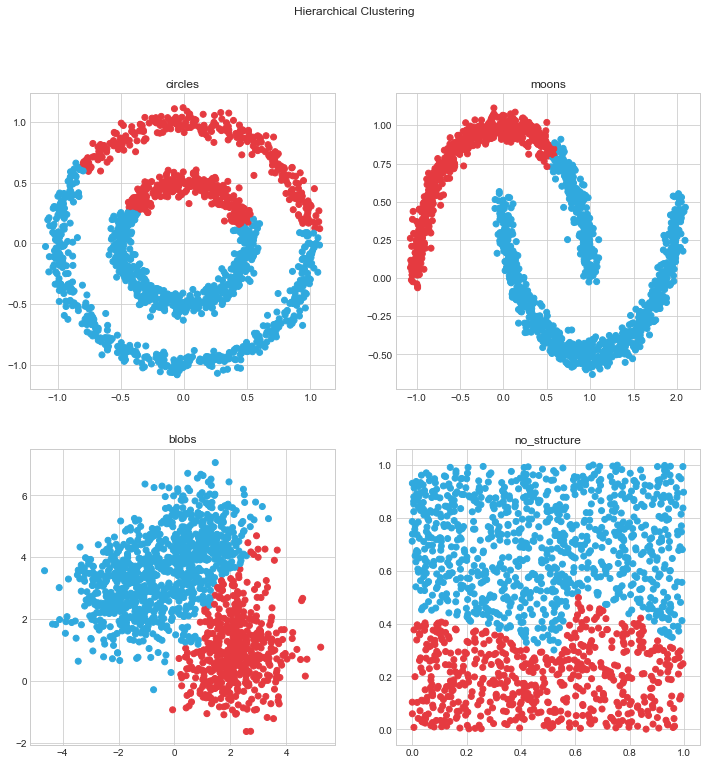

In [82]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2,linkage='ward'),circles,221,'circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2,linkage='ward'),moons,222,'moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2,linkage='ward'),blobs,223,'blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2,linkage='ward'),no_structure,224,'no_structure')

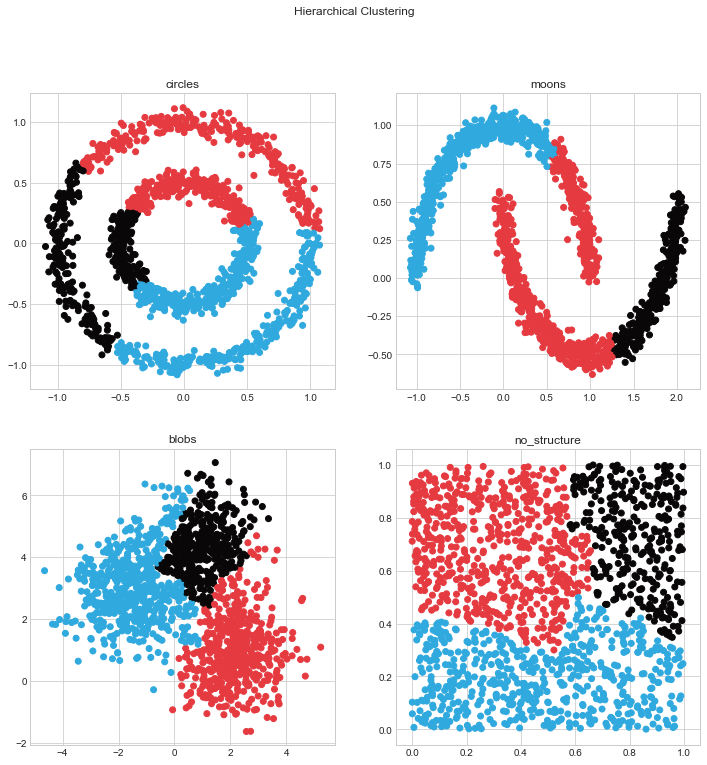

In [81]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3,linkage='ward'),circles,221,'circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3,linkage='ward'),moons,222,'moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3,linkage='ward'),blobs,223,'blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3,linkage='ward'),no_structure,224,'no_structure')

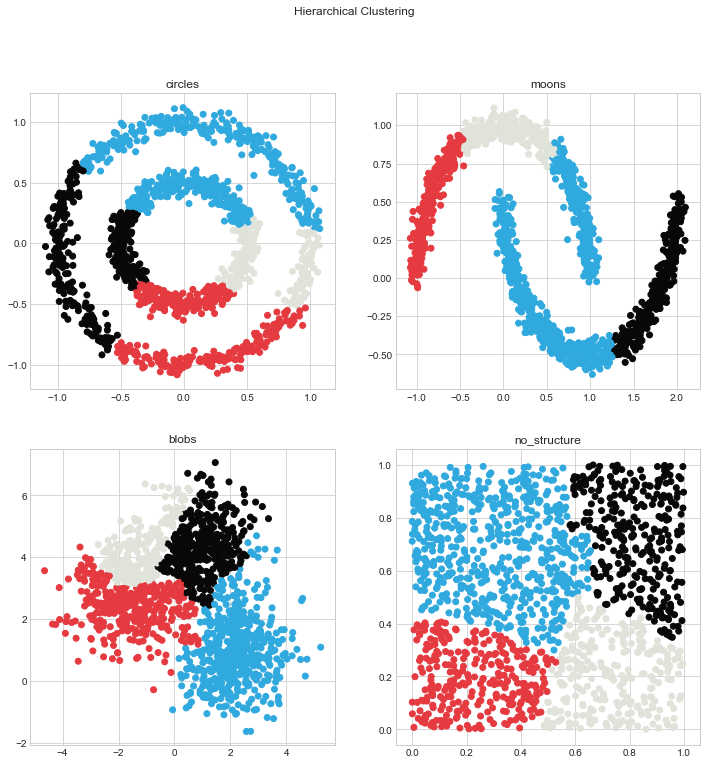

In [83]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4,linkage='ward'),circles,221,'circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4,linkage='ward'),moons,222,'moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4,linkage='ward'),blobs,223,'blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4,linkage='ward'),no_structure,224,'no_structure')

### 와인 데이터 군집화

In [1]:
from sklearn.datasets import load_wine

In [87]:
wine = load_wine()

In [88]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict = model.labels_

In [89]:
idx = np.where(predict==0)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [90]:
idx = np.where(predict==1)
wine.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

### DBSCAN(Density Based Spatial Clustering of Application with Noise) 

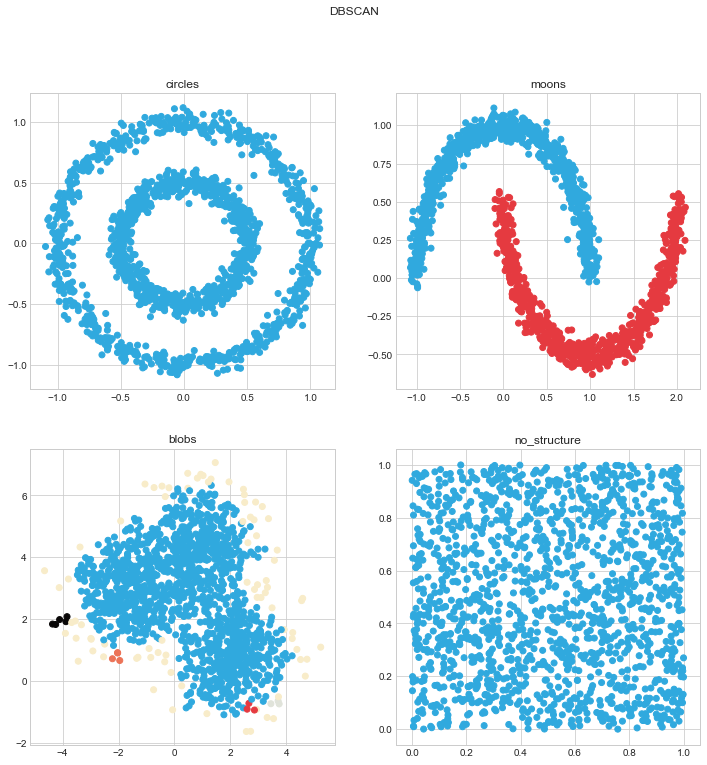

In [26]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=.3),circles,221,'circles')
fit_predict_plot(cluster.DBSCAN(eps=.3),moons,222,'moons')
fit_predict_plot(cluster.DBSCAN(eps=.3),blobs,223,'blobs')
fit_predict_plot(cluster.DBSCAN(eps=.3),no_structure,224,'no_structure')

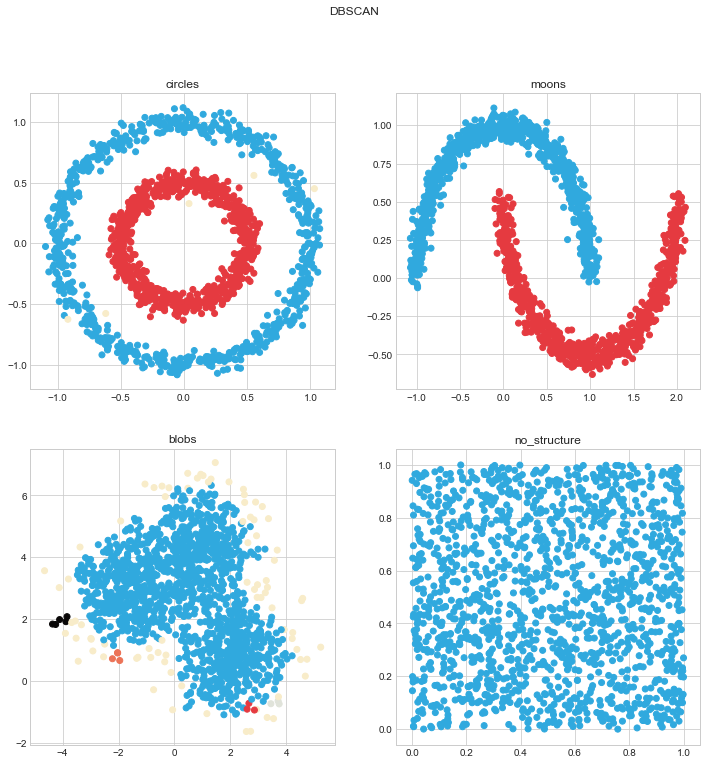

In [25]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=0.09),circles,221,'circles')
fit_predict_plot(cluster.DBSCAN(eps=.3),moons,222,'moons')
fit_predict_plot(cluster.DBSCAN(eps=.3),blobs,223,'blobs')
fit_predict_plot(cluster.DBSCAN(eps=.3),no_structure,224,'no_structure')

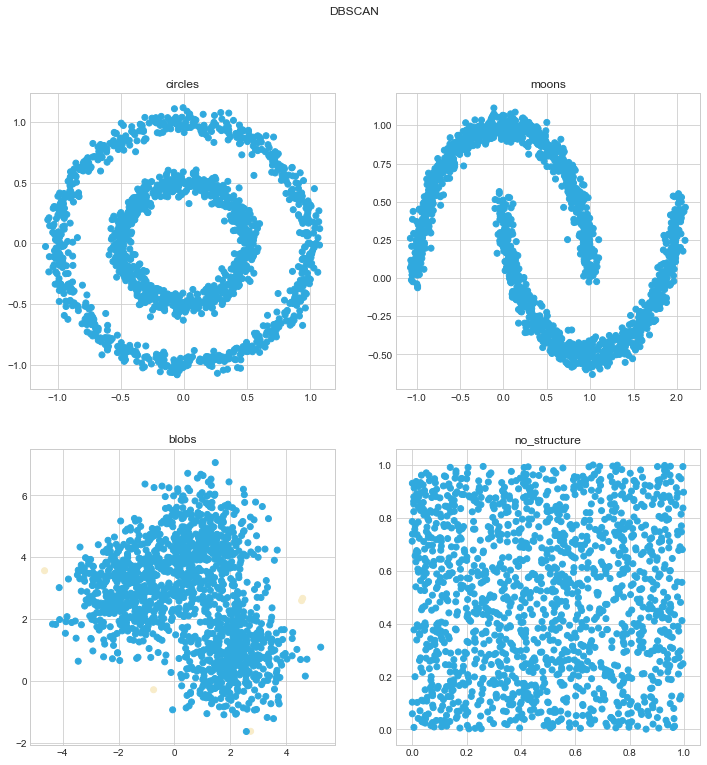

In [92]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=.7),circles,221,'circles')
fit_predict_plot(cluster.DBSCAN(eps=.7),moons,222,'moons')
fit_predict_plot(cluster.DBSCAN(eps=.7),blobs,223,'blobs')
fit_predict_plot(cluster.DBSCAN(eps=.7),no_structure,224,'no_structure')

### OPTICS(Ordering Points To Identify the Clustering Structure) 

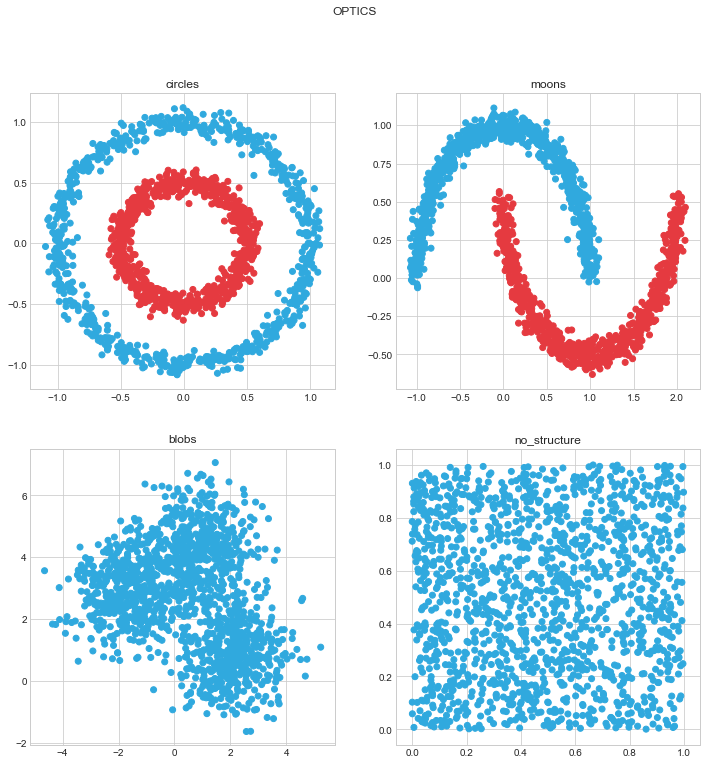

In [97]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('OPTICS')

fit_predict_plot(cluster.OPTICS(min_samples=20,xi=.05,min_cluster_size=0.1),circles,221,'circles')
fit_predict_plot(cluster.OPTICS(min_samples=20,xi=.05,min_cluster_size=0.1),moons,222,'moons')
fit_predict_plot(cluster.OPTICS(min_samples=20,xi=.05,min_cluster_size=0.1),blobs,223,'blobs')
fit_predict_plot(cluster.OPTICS(min_samples=20,xi=.05,min_cluster_size=0.1),no_structure,224,'no_structure')

### Birch(Balanced iterative reducting and clustering using Herarchies)

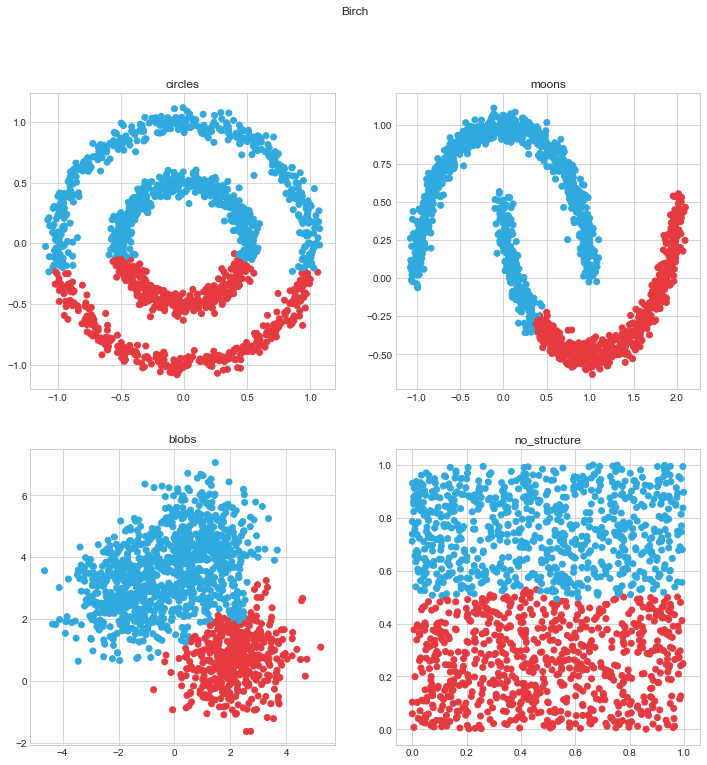

In [101]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),circles,221,'circles')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),moons,222,'moons')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),blobs,223,'blobs')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3),no_structure,224,'no_structure')

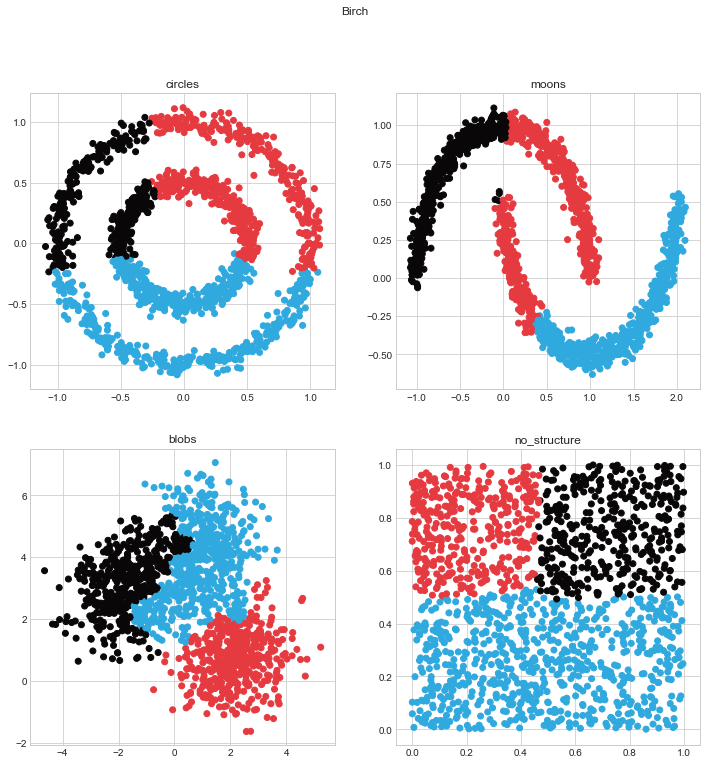

In [102]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),circles,221,'circles')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),moons,222,'moons')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),blobs,223,'blobs')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=0.3),no_structure,224,'no_structure')

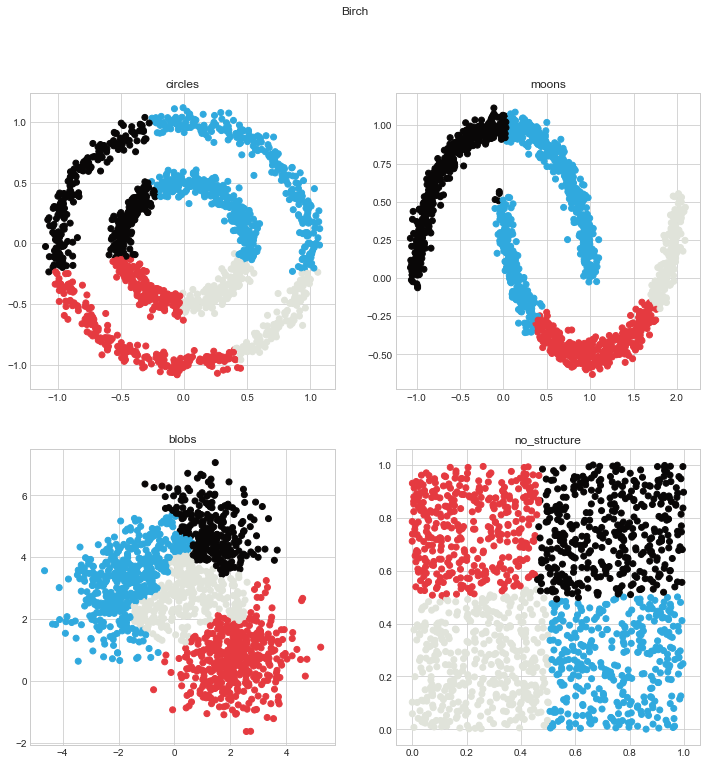

In [103]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),circles,221,'circles')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),moons,222,'moons')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),blobs,223,'blobs')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=0.3),no_structure,224,'no_structure')

### 손글씨 데이터 군집화

In [104]:
from sklearn.datasets import load_digits

In [106]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [107]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [108]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [109]:
X = digits.data.reshape(-1,8,8)
y = digits.target

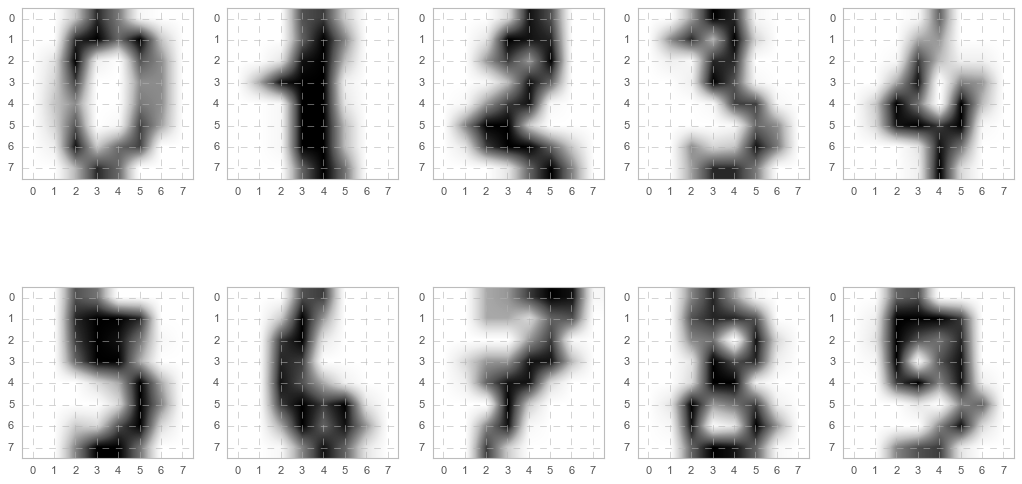

In [117]:
plt.style.use(['bmh'])
plt.figure(figsize=(16,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i])

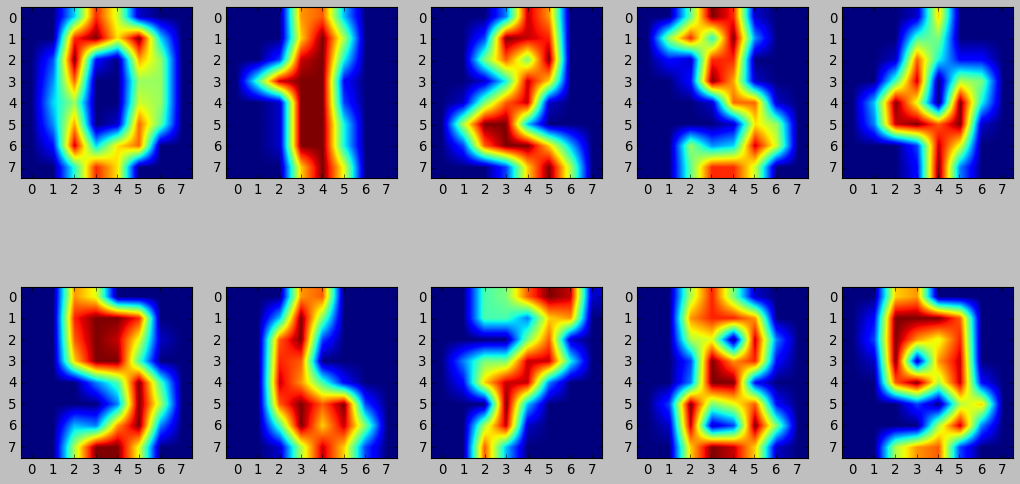

In [113]:
plt.style.use(['classic'])
plt.figure(figsize=(16,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i])

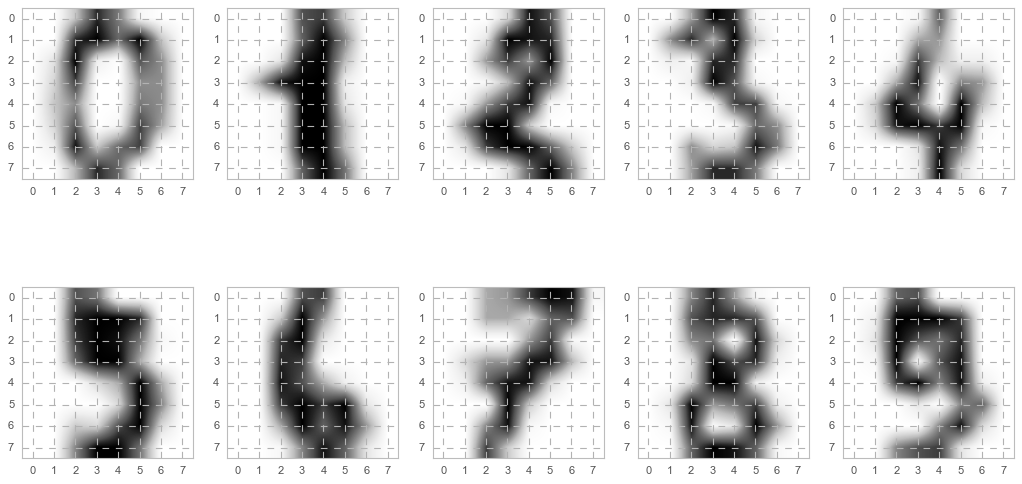

In [119]:
plt.style.use(['seaborn-notebook'])
plt.figure(figsize=(16,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i])

### K-Means

In [121]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
predict = kmeans.predict(digits.data)

In [123]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {}:{}'.format(i+1, real_class))

Cluster 1:[1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 9 9 1 1 1 1 1 1 1 1 1
 1 1 1 4 8 9 9 4 9 9 9 9 9 9 9 9 9 9 9 8 8 8 8 1 1 1 1 1 1 1 1 1 1 1 8 1 1
 1 1 1 1 1 1 9 9 9 9 9]
Cluster 2:[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 8 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 5 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
Cluster 3:[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 8 8 5 8 5 5 5 1 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 8 5 5 5 5 5 8 5 5 5 9 9 5 5 5 5 5 5 5 9 9 5 5 3 5 5 5 5 5
 5 3 5]
Cluster 4:[2 8 8 8 8 8 2 2 8 9 8 8 8 2 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 6 8 2 8 8 8 8 8 8 8 9 

Cluster : 1


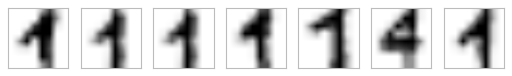

Cluster : 2


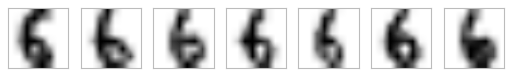

Cluster : 3


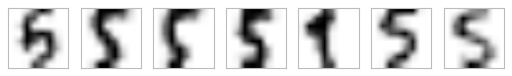

Cluster : 4


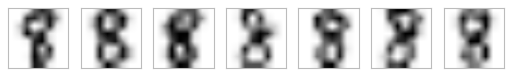

Cluster : 5


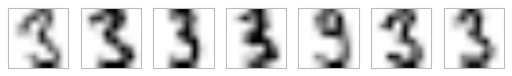

Cluster : 6


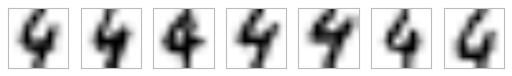

Cluster : 7


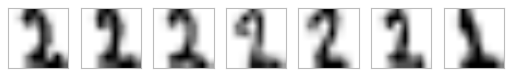

Cluster : 8


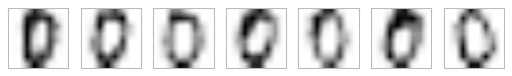

Cluster : 9


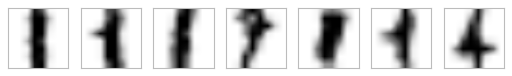

Cluster : 10


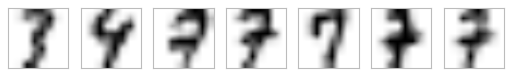

In [128]:
for i in range(10):
    idx = np.where(predict==i)[0]
    choice_idx = np.random.choice(idx, size=7)
    choice_image = X[choice_idx]
    
    k=1
    
    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1,7,k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1
        
    plt.show()

### Spectral Clustering 

In [134]:
spectral = cluster.SpectralClustering(n_clusters=10,eigen_solver='arpack',affinity='nearest_neighbors')
spectral.fit(digits.data)
predict = spectral.labels_

In [135]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {}:{}'.format(i+1, real_class))

Cluster 1:[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Cluster 2:[1 2 8 8 8 8 8 2 2 8 2 2 9 2 8 2 1 8 1 3 8 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 1 8 1 8 1 8 8 8 1 1 8 1 8 1 1 1 1 8 1 1 8 8 8 8 8 8 8 8 8 8 6 2 8 8 8
 8 8 8 8 9 8 8 8 8 8 1 8 8 8 8 8 1 8 1 8 1 8 8 8 1 1 8 1 1 8 1 1 1 1 8 1 1
 8 8 8 8 8 1 8 1 1 8 8 8 1 1 8 1 8 1 1 1 1 8 1 1 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 1 8 1 8 1 8 8 8 1 1 8 1 1 9 8 1 1 1 1 8 1 1 8 8 8 8 8 8 8 1 8 8 8 1 3 8
 1 1 8 1 1 1 1 8 1 1 8 8 8 8 8 8 1 8 8 8 8 1 1 8 1 8 1 1 1 8 1 1 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 1 8 1 1 8 8 8 1 3 1 8 1 3 3 3 1 8 1 1 1 1 8 1 1 4 8
 8 1 8 1 8 1 8 8 8 1 3 1 8 1 3 3 1 8 1 1 1 1 8 1 1 8 8 8 8 8]
Cluster 3:[3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 

Cluster : 1


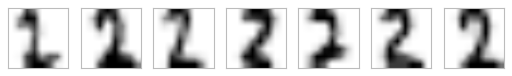

Cluster : 2


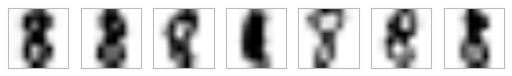

Cluster : 3


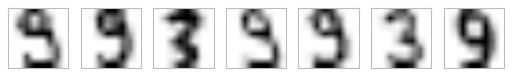

Cluster : 4


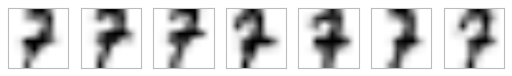

Cluster : 5


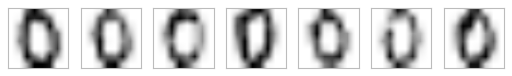

Cluster : 6


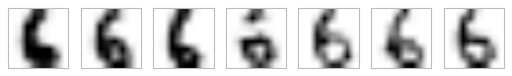

Cluster : 7


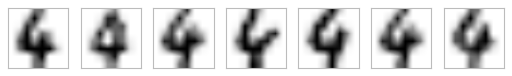

Cluster : 8


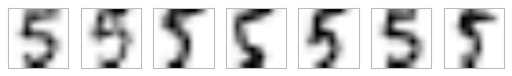

Cluster : 9


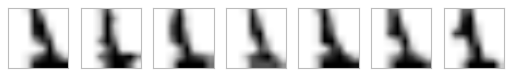

Cluster : 10


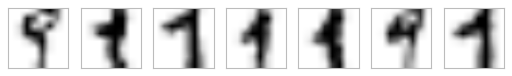

In [136]:
for i in range(10):
    idx = np.where(predict==i)[0]
    choice_idx = np.random.choice(idx, size=7)
    choice_image = X[choice_idx]
    
    k=1
    
    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1,7,k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1
        
    plt.show()

### 계층 군집화(Hierarchical Clustering)

In [140]:
hierarchical = cluster.AgglomerativeClustering(n_clusters=10,linkage='ward')
hierarchical.fit(digits.data)
predict = hierarchical.labels_

In [141]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {}:{}'.format(i+1, real_class))

Cluster 1:[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2:[3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9 3 9

Cluster : 1


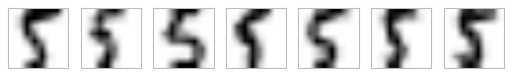

Cluster : 2


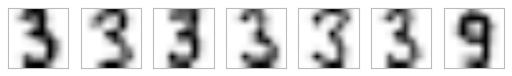

Cluster : 3


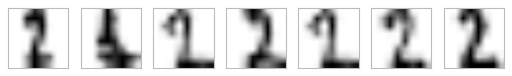

Cluster : 4


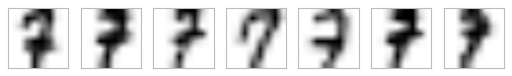

Cluster : 5


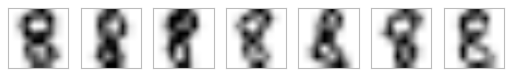

Cluster : 6


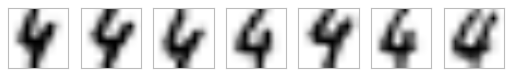

Cluster : 7


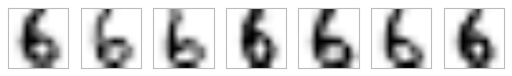

Cluster : 8


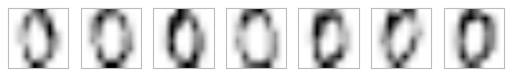

Cluster : 9


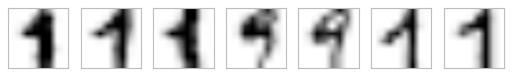

Cluster : 10


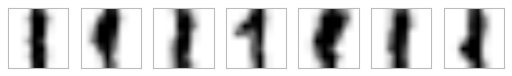

In [142]:
for i in range(10):
    idx = np.where(predict==i)[0]
    choice_idx = np.random.choice(idx, size=7)
    choice_image = X[choice_idx]
    
    k=1
    
    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1,7,k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1
        
    plt.show()

### Birch 

In [143]:
Birch = cluster.Birch(n_clusters=10,threshold=0.3)
Birch.fit(digits.data)
predict = Birch.predict(digits.data)

In [144]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster {}:{}'.format(i+1, real_class))

Cluster 1:[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2:[3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9 3 9

Cluster : 1


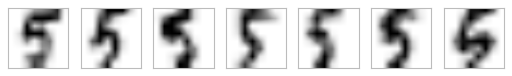

Cluster : 2


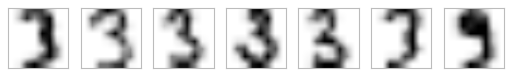

Cluster : 3


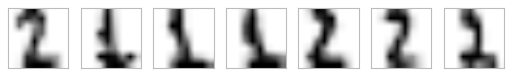

Cluster : 4


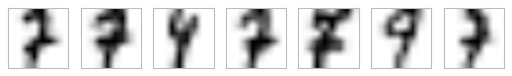

Cluster : 5


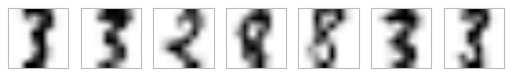

Cluster : 6


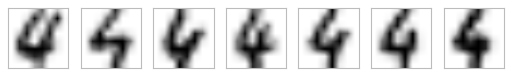

Cluster : 7


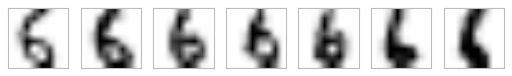

Cluster : 8


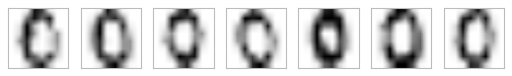

Cluster : 9


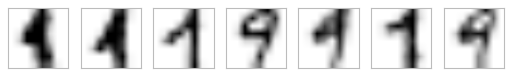

Cluster : 10


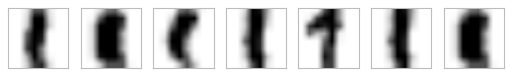

In [146]:
for i in range(10):
    idx = np.where(predict==i)[0]
    choice_idx = np.random.choice(idx, size=7)
    choice_image = X[choice_idx]
    
    k=1
    
    print('Cluster : {}'.format(i+1))
    for image in choice_image:
        plt.subplot(1,7,k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k += 1
        
    plt.show()